In [48]:
###############################################################

# Ziel der Übung: Wir erzeugen ein vollständig verbundenes neuronales Netzwerk.
# Es besteht aus drei Teilen
# Input-Layer 4 Neuronen
# Hidden-Layer 10 Neuronen
# Output-Layer 3 Neuronen

################################################################

In [49]:
#Pakete
import pandas

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix



In [50]:
# Wir laden die Daten aus dem Iris-Datenset.

data_train = pandas.read_csv("./iris.csv")

# print(data_train)

data_train.loc[data_train["variety"] == "Setosa", "variety"] = 0
data_train.loc[data_train["variety"] == "Versicolor", "variety"] = 1
data_train.loc[data_train["variety"] == "Virginica", "variety"] = 2
data_train = data_train.apply(pandas.to_numeric)



data_train_array = data_train.values

# print(data_train_array)


In [51]:
# Bereite den Datensatz vor
#
# Der gesamte Datensatz soll nun in zwei Kategorien aufgteilt werden: 
# Testdaten und Trainingsdaten
# 80% der Daten werden zum Trainieren verwendet
# 20% der Daten zum Testen
# Wir trennen Input Werte und Output Werte

training_set, test_set, training_results, test_results = train_test_split(data_train_array[:,:4], data_train_array[:,4], test_size=0.2)

In [52]:
# Erstelle Neuronales Netz
neuronal_network = MLPClassifier(hidden_layer_sizes=(10), activation="logistic", max_iter=10_000)

In [53]:
# Trainiere neuronale Netz mit Trainingsdaten
neuronal_network.fit(training_set, training_results)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=10000)

In [54]:
# Modell soll nun mit den Testdaten überprüft werden

predictions = neuronal_network.predict(test_set)

print(confusion_matrix(test_results, predictions))


[[ 6  0  0]
 [ 0 12  1]
 [ 0  0 11]]


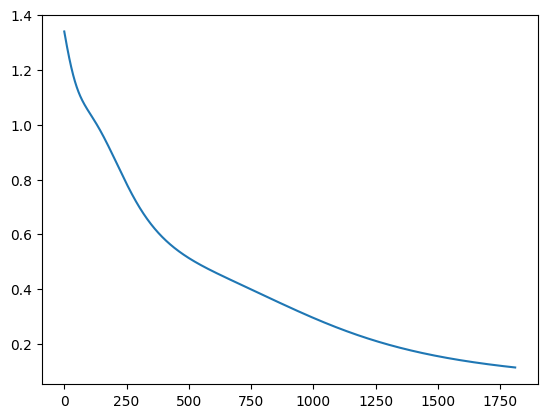

In [55]:
# Loss-Kurve visualisieren wir speichern dies in plot_loss_values.png.

loss_values = neuronal_network.loss_curve_

plt.plot(loss_values)
plt.savefig("./plot_loss_values.png")

In [56]:
# Vorhersage: Wir geben jetzt ein paar Daten ins Netzwerk rein und schauen, ob die Ergebnisse stimmen.

p1 = [6.3,3.3,6,2.5] # Iris Verginica

result = neuronal_network.predict([p1])
print(result)

[2.]


In [ ]:
print(neuronal_network.coefs_)